In [1]:
# 39개 마커
MARKERS = ['LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7', 'LSHO', 'RSHO', 'CLAV', 'RBAK',
           'LUPA', 'RUPA', 'STRN', 'T10', 'LELB', 'RELB', 'LFRM', 'RFRM',
           'LWRA', 'RWRA', 'LWRB', 'RWRB', 'LFIN', 'RFIN', 'LASI', 'RASI',
           'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB',
           'LANK', 'RANK', 'LTOE', 'RTOE', 'LHEE', 'RHEE']
len(MARKERS)

39

In [2]:
import os
import glob

import pandas as pd
import numpy as np
from scipy.linalg import dft

import matplotlib.pyplot as plt

In [3]:
DATAPATH = "/Users/sujinlee/Desktop/nims/pd/dataset"
CONTROL = os.path.join(DATAPATH, "Controls")
PD = os.path.join(DATAPATH, "PD")

df_patients = pd.read_csv(os.path.join(DATAPATH, "patients.csv"))
df_null_info = pd.read_csv(os.path.join(DATAPATH, "NULL_info.csv"))
df_csvinfo = pd.read_csv(os.path.join(DATAPATH, "csvinfo.csv"))

In [4]:
SAVEPATH = "/Users/sujinlee/Desktop/nims/pd/experiment3_dft"

In [5]:
def dft_left_right(TARGET_CATE, TARGET_MOTION, TARGET_MARKER, WINDOW_SIZE):
    results = []
    inner_product = []

    for csv_file in os.listdir(TARGET_CATE):

        if TARGET_MOTION in csv_file: 

            df = pd.read_csv(os.path.join(TARGET_CATE, csv_file))
            df = df.dropna()
            
            if len(df) < WINDOW_SIZE: continue 
            
            df_sub = df[:WINDOW_SIZE]
        #     print(csv_file, '|', len(df_sub))

            m_left = dft(len(df_sub[f"L{TARGET_MARKER}_Z"].values))
            x_left = df_sub[f"L{TARGET_MARKER}_Z"].values

            X_left = m_left @ x_left

            m_right = dft(len(df_sub[f"R{TARGET_MARKER}_Z"].values))
            x_right = df_sub[f"R{TARGET_MARKER}_Z"].values

            X_right = m_right @ x_right

            info = {"filename": csv_file,
                    "length": len(df_sub),
                    "X_left": X_left,
                    "X_right": X_right,
                    "inner product": abs(X_left) @ abs(X_right)
                   }
        #     print(info)
            if info["inner product"] != None:
                inner_product.append(info["inner product"])

            results.append(info)

    print("Category:", TARGET_CATE)
    print("Motion:", TARGET_MOTION)
    print("Marker:", TARGET_MARKER)
    print("Window:", WINDOW_SIZE)
    print("Count:", len(results))
    print("Mean: ", np.mean(np.array(inner_product)))
    print("Std: ", np.std(np.array(inner_product)))

    plt.scatter(range(0, len(inner_product)), inner_product)
    plt.xlabel("Files")
    plt.ylabel("Inner product")
    plt.title("left & right inner product")
    plt.show()

    plt.hist(inner_product)
    plt.xlabel("Inner product")
    plt.ylabel("Count")
    plt.title("left & right inner product histogram")
    plt.show()
    
    return results, inner_product

Category: /Users/sujinlee/Desktop/nims/pd/dataset/PD
Motion: FW
Marker: HEE
Window: 200
Count: 213
Mean:  412451079.4193728
Std:  104817963.89615643


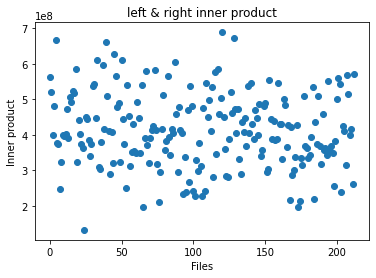

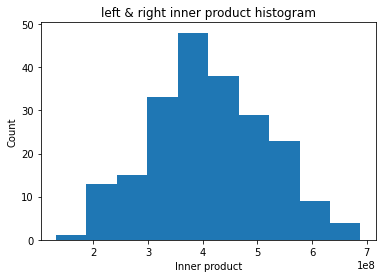

Category: /Users/sujinlee/Desktop/nims/pd/dataset/Controls
Motion: FW
Marker: HEE
Window: 200
Count: 66
Mean:  475164960.56329465
Std:  81849636.6449976


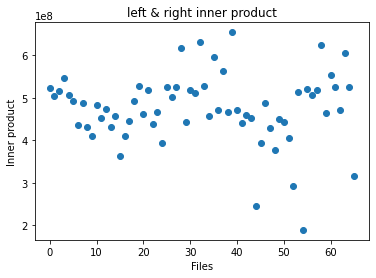

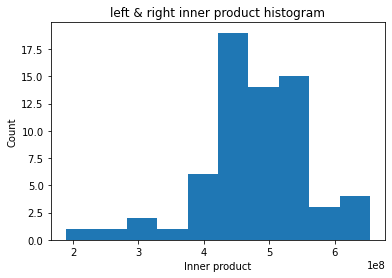

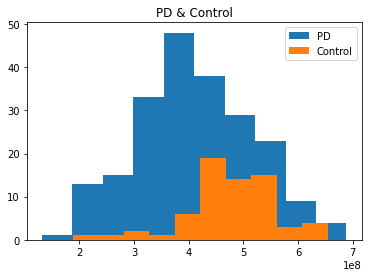

In [6]:
# PD & Control, FW, HEE, 200

# run
results_pd, inner_product_pd = dft_left_right(TARGET_CATE=PD, TARGET_MOTION="FW", TARGET_MARKER="HEE", WINDOW_SIZE=200)
results_control, inner_product_control = dft_left_right(TARGET_CATE=CONTROL, TARGET_MOTION="FW", TARGET_MARKER="HEE", WINDOW_SIZE=200)

# plot
plt.hist(inner_product_pd, label="PD")
plt.hist(inner_product_control, label="Control")
plt.title("PD & Control")
plt.legend()
plt.show()

# save
np.save(os.path.join(SAVEPATH, "dft_left_right_FW_HEE_200_PD.npy"), results_pd)
np.save(os.path.join(SAVEPATH, "dft_left_right_FW_HEE_200_CONTROL.npy"), results_control)

Category: /Users/sujinlee/Desktop/nims/pd/dataset/PD
Motion: BW
Marker: HEE
Window: 200
Count: 200
Mean:  179040850.2624746
Std:  77290886.96349032


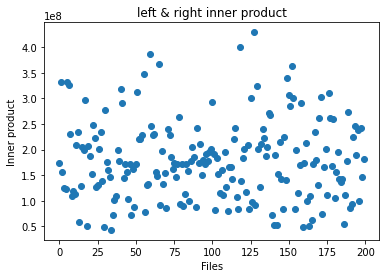

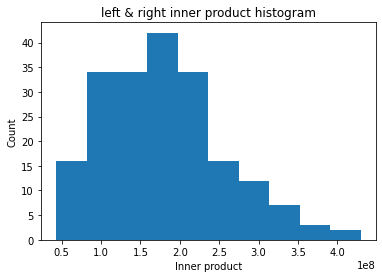

Category: /Users/sujinlee/Desktop/nims/pd/dataset/Controls
Motion: BW
Marker: HEE
Window: 200
Count: 69
Mean:  331368375.7807606
Std:  144604094.95292473


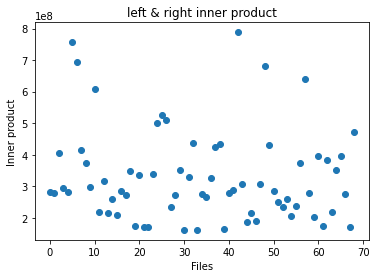

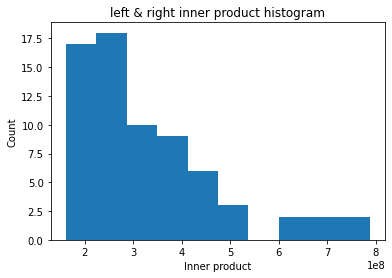

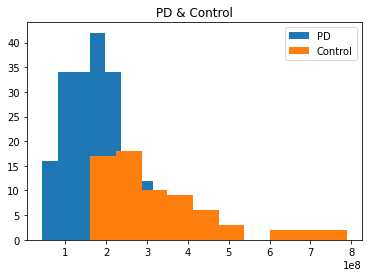

In [7]:
# # PD & Control, BW, HEE, 200

# run
results_pd, inner_product_pd = dft_left_right(TARGET_CATE=PD, TARGET_MOTION="BW", TARGET_MARKER="HEE", WINDOW_SIZE=200)
results_control, inner_product_control = dft_left_right(TARGET_CATE=CONTROL, TARGET_MOTION="BW", TARGET_MARKER="HEE", WINDOW_SIZE=200)

# plot
plt.hist(inner_product_pd, label="PD")
plt.hist(inner_product_control, label="Control")
plt.title("PD & Control")
plt.legend()
plt.show()

# save
np.save(os.path.join(SAVEPATH, "dft_left_right_BW_HEE_200_PD.npy"), results_pd)
np.save(os.path.join(SAVEPATH, "dft_left_right_BW_HEE_200_CONTROL.npy"), results_control)